# Hypothesis Test of Marketing sales data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('marketing_sales_data.csv')

In [3]:
df.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
5,Low,5.561586,3.530209,Nano,39.992087
6,Medium,13.951808,4.477142,Micro,147.150178
7,Medium,28.352592,4.695376,Mega,229.141912
8,Medium,15.322175,4.379750,Macro,222.696768
9,High,26.914287,6.074165,Mega,322.466797


In [7]:
df.describe()

,Radio,Social Media,Sales
count,572.000000,572.000000,572.000000
mean,17.520616,3.333803,189.296908
std,9.290933,2.238378,89.871581
min,0.109106,0.000031,33.509810
25%,10.699556,1.585549,118.718722
50%,17.149517,3.150111,184.005362
75%,24.606396,4.730408,264.500118
max,42.271579,11.403625,357.788195


In [7]:
df.describe(include = ['O'])

,TV,Influencer
count,572,572
unique,3,4
top,Medium,Nano
freq,205,157


<Axes: xlabel='TV', ylabel='Sales'>

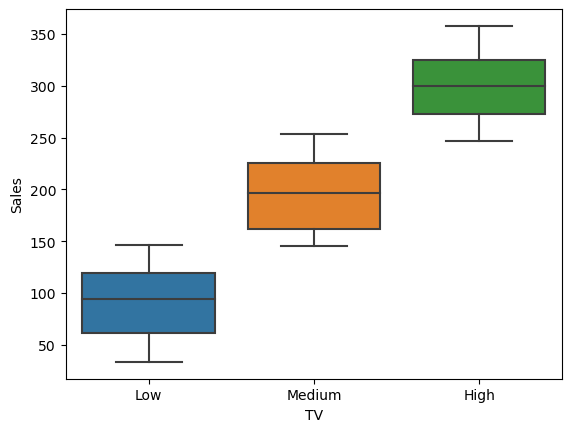

In [25]:
sns.boxplot(x = "TV", y = "Sales", data = df, order=["Low", "Medium", "High"])

<Axes: xlabel='Influencer', ylabel='Sales'>

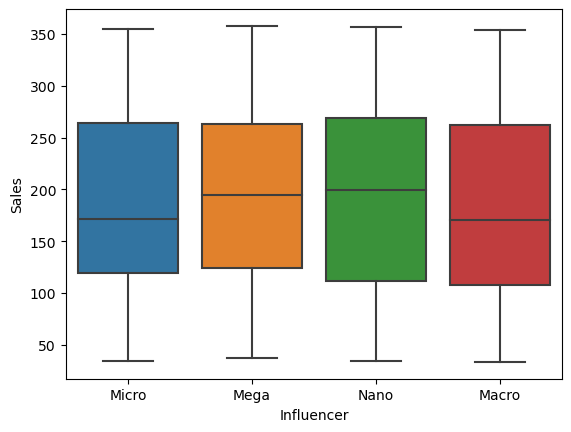

In [5]:
sns.boxplot(x = "Influencer", y = "Sales", data = df)

In [9]:
df["Radio_grouped"] = pd.qcut(df["Radio"], 4)

In [11]:
df.groupby(["Radio_grouped"], as_index = False)["Sales"].mean()

,Radio_grouped,Sales
0,"(0.108, 10.7]",90.588629
1,"(10.7, 17.15]",154.235406
2,"(17.15, 24.606]",217.089462
3,"(24.606, 42.272]",295.274134


In [14]:
def change_func(x):
    if x <= 10.7:
        return "Low"
    elif 10.7 < x <= 17.15:
        return "Medium"
    elif 17.15 < x <= 24.606:
        return "High"
    else:
        return "Premium"


df["Radio_"]= df["Radio"].apply(lambda x: change_func(x))

<Axes: xlabel='Radio_', ylabel='Sales'>

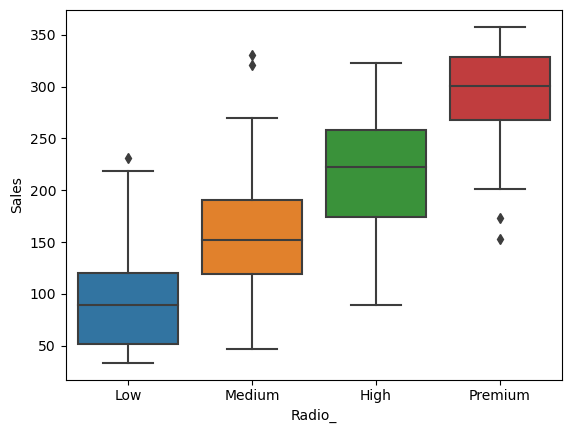

In [24]:
sns.boxplot(x = "Radio_", y = "Sales", data = df, order=["Low", "Medium", "High","Premium"])

In [ ]:
df["Social_Media_grouped"] = pd.qcut(df["Social Media"], 4)

In [12]:
df.groupby(["Social_Media_grouped"], as_index = False)["Sales"].mean()

,Social_Media_grouped,Sales
0,"(-0.0009687000000000001, 1.586]",128.505995
1,"(1.586, 3.15]",161.637842
2,"(3.15, 4.73]",215.117666
3,"(4.73, 11.404]",251.926129


In [16]:
def change_func(x):
    if x <= 1.586:
        return "Low"
    elif 1.586 < x <= 3.15:
        return "Medium"
    elif 3.15 < x <= 4.73:
        return "High"
    else:
        return "Premium"


df["Social_Media"]= df["Social Media"].apply(lambda x: change_func(x))

<Axes: xlabel='Social_Media', ylabel='Sales'>

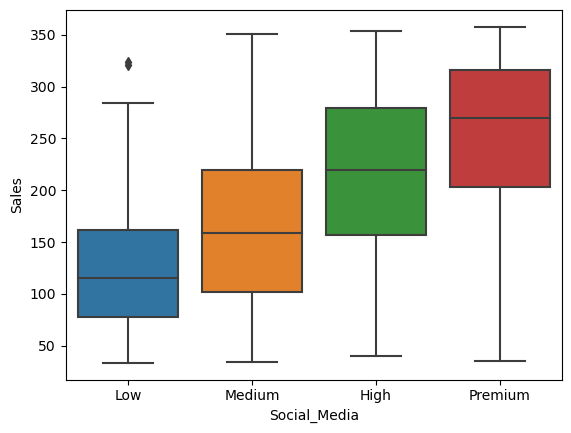

In [23]:
sns.boxplot(x = "Social_Media", y = "Sales", data = df, order=["Low", "Medium", "High","Premium"])

In [26]:
df = df.dropna(axis=0)

In [27]:
df.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [18]:

ols_formula = 'Sales ~ C(TV) + C(Influencer) + C(Radio_) + C(Social_Media)'

OLS = ols(formula = ols_formula, data = df)

model = OLS.fit()

model_results = model.summary()


In [19]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     438.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          9.10e-267
Time:                        06:41:13   Log-Likelihood:                -2737.1
No. Observations:                 572   AIC:                             5498.
Df Residuals:                     560   BIC:                             5550.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    282.4208      4.747     59.491      0.000     273.096     291.745
C(TV)[T.Low]                -163.3168      5.284    -30.905      0.000    -173.697    -152.937
C(TV)[T.Medium]              -81.6959      4.140    -19.731      0.000     -89.828     -73.563
C(Influencer)[T.Mega]          1.6893      3.649      0.463      0.644      -5.479       8.857
C(Influencer)[T.Micro]         3.1817      3.541      0.899      0.369      -3.773      10.137
C(Influencer)[T.Nano]          1.1573      3.514      0.329      0.742      -5.745       8.060
C(Radio_)[T.Low]             -38.1553      4.773     -7.993      0.000     -47.531     -28.779
C(Radio_)[T.Medium]          -11.8842      3.889     -3.056      0.002     -19.523      -4.245
C(Radio_)[T.Premium]          24.4246      4.317      5.658      0.000      15.945      32.904
C(Social_Media)[T.Low]        -3.0343      3.846     -0.789      0.430     -10.589       4.520
C(Social_Media)[T.Medium]     -3.1675      3.586     -0.883      0.377     -10.212       3.877
C(Social_Media)[T.Premium]    -0.2540      3.638     -0.070      0.944      -7.400       6.892
==============================================================================
Omnibus:                       77.992   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.680
Skew:                           0.084   Prob(JB):                     3.23e-05
Kurtosis:                       2.084   Cond. No.                         8.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),829843.791649,2.0,484.077246,8.429739e-123
C(Influencer),725.069378,3.0,0.281972,8.384278e-01
C(Radio_),91590.500983,3.0,35.618653,4.432721e-21
C(Social_Media),918.810964,3.0,0.357317,7.838662e-01
Residual,479998.313597,560.0,NaN,NaN


In [36]:
tukey_oneway = pairwise_tukeyhsd(endog = df["Sales"], groups = df["TV"])
# Display the results
tukey_oneway.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-209.8691,0.0,-217.8438,-201.8944,True
High,Medium,-105.4952,0.0,-113.4346,-97.5557,True
Low,Medium,104.3739,0.0,96.8261,111.9218,True


In [37]:
tukey_oneway = pairwise_tukeyhsd(endog = df["Sales"], groups = df["Influencer"])
# Display the results
tukey_oneway.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
Macro,Mega,12.8179,0.6547,-15.7438,41.3795,False
Macro,Micro,6.6518,0.9276,-21.2657,34.5692,False
Macro,Nano,10.2044,0.7777,-17.4683,37.877,False
Mega,Micro,-6.1661,0.9379,-33.5245,21.1923,False
Mega,Nano,-2.6135,0.9946,-29.7221,24.4951,False
Micro,Nano,3.5526,0.9857,-22.8764,29.9816,False


In [21]:
tukey_oneway = pairwise_tukeyhsd(endog = df["Sales"], groups = df["Radio_"])
# Display the results
tukey_oneway.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-126.5008,0.0,-141.2257,-111.776,True
High,Medium,-62.8541,0.0,-77.5789,-48.1292,True
High,Premium,78.1847,0.0,63.4598,92.9095,True
Low,Medium,63.6468,0.0,48.9219,78.3716,True
Low,Premium,204.6855,0.0,189.9606,219.4104,True
Medium,Premium,141.0387,0.0,126.3139,155.7636,True


In [22]:
tukey_oneway = pairwise_tukeyhsd(endog = df["Sales"], groups = df["Social_Media"])
# Display the results
tukey_oneway.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-86.6117,0.0,-109.9008,-63.3225,True
High,Medium,-53.4798,0.0,-76.769,-30.1907,True
High,Premium,36.8085,0.0003,13.5193,60.0976,True
Low,Medium,33.1318,0.0015,9.8427,56.421,True
Low,Premium,123.4201,0.0,100.131,146.7093,True
Medium,Premium,90.2883,0.0,66.9991,113.5775,True
